# FLIPKART CUSTOMER SENTIMENT PROJECT

**Presented by:**

1. Pauline Ndungu
2. Samuel Mbugua Igecha
3. Leonard Rotich
4. Samwel Muiru
5. Maureen Anduuru
6. Henry Mativo

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1.0 Business Understanding
## 1.1 Overview

Flipkart Private Limited is a prominent Indian e-commerce company headquartered in Bengaluru. Established in Singapore as a private limited company, Flipkart initially specialized in online book sales. Over time, the company expanded its offerings to encompass various product categories such as consumer electronics, fashion, home essentials, groceries, and lifestyle products.

In the highly competitive Indian e-commerce landscape, Flipkart's key rivals include Amazon India, Alibaba and domestic contender Snapdeal. As of March 2017, Flipkart secured a substantial 39.5% market share in the Indian e-commerce industry. Notably, the company has established a dominant presence in the apparel segment, thanks to its strategic acquisition of Myntra. Furthermore, Flipkart competes head-to-head with Amazon in the sale of electronics and mobile phones, signifying its strength in those areas.

## 1.2 Problem Statement
The stakeholder for this project is Flipkart, a prominent Indian e-commerce company. Flipkart aims to leverage Natural Language Processing (NLP) techniques to enhance its business understanding and improve customer experiences.

The project focuses on utilizing NLP algorithms and methodologies to gain valuable insights from customer feedback, product reviews, and other textual data available on the Flipkart platform. By analyzing and extracting information from this data, Flipkart aims to gain a comprehensive understanding of customer preferences, sentiments, and needs.

Specifically, the project involves applying NLP techniques to perform sentiment analysis, topic modeling, and customer sentiment classification. By leveraging these methods, Flipkart seeks to identify emerging trends, popular product categories, and areas for improvement within its offerings.

By harnessing the power of NLP, Flipkart aims to enhance its decision-making processes, refine its product selection, and provide a more tailored and satisfying shopping experience for its customers. This project aligns with Flipkart's commitment to continuous innovation and delivering value to its customer base through cutting-edge technologies.

## 1.3 Metrics of Success

An accuracy score of atleast 80% as the benchmark

## 1.4 Main Objective

Develop an NLP Application that will allow users to input new product reviews and deploy the sentiment analysis model in a production environment to classify the sentiment of reviews in real time.

### Specific Objective

1.  ***Sentiment Analysis*** - Perform sentiment analysis on customer reviews, ratings, and feedback to accurately identify positive, negative, and neutral sentiments, allowing for actionable insights and targeted improvements.

2. Improve the accuracy and relevance of search results and product descriptions by leveraging NLP techniques such as natural language understanding and information extraction.



# 2.0 Data Understanding

The Dataset contains 189,874 rows and 5 columns. The column names include;

1. `ProductName` - Name of products
2. `Price` - the prices of the products(In Indian Rupees)
3. `Rate` - the customers' ratings out of 5
4. `Review` - short customer review of the products
5. `summary` - more detailed review of the products

# 3.0 Data Preparation

### Importing Libraries

In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 281.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 250.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 196.8 kB/s eta 0:00:0000:0100:01


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import pickle

# import important libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
# from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/henry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/henry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/henry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/henry/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Loading the data

In [8]:
df = pd.read_csv('flipkart_product.csv', encoding='latin-1')
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


### Data Exploration

Before any cleaning and analysis takes place, we will first explore our dataset.

In [9]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [10]:
df.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary'], dtype='object')

In [11]:
df.dtypes

ProductName    object
Price          object
Rate           object
Review         object
Summary        object
dtype: object

In [12]:
# Checking the shape of dataset
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 189874
Number of columns: 5


In [13]:
# function to identify missing and duplicate values
def clean_data(df):
    print("Missing values:\n", df.isnull().sum())
    print("------------------------------------------\n")
    print("Percentage of Missing values:\n", df.isnull().sum()/len(df)*100)
    print("------------------------------------------\n")
    print("No. of duplicated values:", df.duplicated().sum())
    print("------------------------------------------\n")
    print("duplicated values:\n",  df[df.duplicated()])
    print("------------------------------------------\n")
    print("Ratings Value counts:\n",  df.Rate.value_counts())
    print("------------------------------------------\n")


clean_data(df)


Missing values:
 ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64
------------------------------------------

Percentage of Missing values:
 ProductName    0.000000
Price          0.000527
Rate           0.000527
Review         0.002107
Summary        0.007373
dtype: float64
------------------------------------------

No. of duplicated values: 24861
------------------------------------------

duplicated values:
                                               ProductName     Price Rate  \
150     MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    4   
154     MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
248     MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
288     MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    4   
338     MAHARAJA WHITELINE 65 L Desert Air Cooler?ÿ?ÿ(...  ??7,999    5   
...                                                   ...       ...  ...  

### 1.2 Data Cleaning

Our dataset is messy, so we shall clean it by dropping Null values and duplicates. We shall also deal with the inconsistencies like removing symbols, punctuations, strings from our numeric data(Price, Rate columns) then will change the datatypes of Price and Rate columns from string to numeric

To ensure the development of a robust and accurate model, several data cleaning techniques will be applied to the dataset. The following techniques will be employed:

1. `Completeness`: This technique involves addressing missing values within the dataset. Steps will be taken to identify and handle missing data appropriately, either through imputation or removal, to ensure that the dataset is complete.

2. `Uniformity`: Uniformity is crucial during the data cleaning process to ensure consistency and accurate analysis. Inconsistent or non-uniform data can introduce errors and bias into the modeling process, leading to unreliable results. Robust techniques will be employed to detect and handle non-uniformity effectively, ensuring that the data is standardized and aligned.

3. `Consistency`: The consistency of the data will be examined to identify any discrepancies or irregularities. Inconsistencies in variables, such as conflicting formats or conflicting information within the dataset, will be addressed and resolved to maintain data integrity.

4. `Validity`: Validity refers to the accuracy and relevance of the data. Data validation techniques will be applied to verify that the values within each variable align with expected ranges or predefined criteria. Any invalid or erroneous data points will be rectified or removed from the dataset.


By applying these data cleaning techniques, the dataset will be refined and prepared, ensuring the reliability and accuracy of the data before proceeding with the subsequent stages of analysis and modeling.

### 1.2.1 Completeness

To achieve completeness in our data, I will be checking for missing values in the data.

In [14]:
df.isna().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

From the above,  we see that we have missing values in ProductName, Price, Rate, Review and Summary.

We are going to remove the missing values in price, rate,review and summary because the dataset includes various products with different prices, rates and reviews thus replacing them may alter the dataset unintentionally.

In [15]:
# drop null values
df = df.dropna()

In [16]:
df.isna().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

We have now removed the null values from our dataset

### 1.2.2 Uniformity

For our data to be uniform, I have to verify that every column is correct and convert them to there appropriate data type.

In [17]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


Now will remove punctuations, symbols, characters from price, productname and summary column using the regular expression("re") module. Then change datatypes of our columns as well

In [18]:
# function to remove punctuation
def rmv_punc(text):
    punct = string.punctuation
    return text.translate(str.maketrans('', '', punct))

In [19]:
# remove punctuations from price & summary  column
df['Summary'] = df['Summary'].apply(lambda x: rmv_punc(x))
df['Price'] = df['Price'].apply(lambda x: rmv_punc(x))
df['Review'] = df['Review'].apply(lambda x: rmv_punc(x))

In [20]:
# remove characters
def rmv_char(text):
    text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
    text = re.sub('\s+',' ', text) #remove whitespace
    return text

In [21]:
# remove characters from product & Price columns
df['Price'] = df['Price'].apply(lambda x: rmv_char(x).lower())
df['ProductName']=df['ProductName'].apply(lambda x:rmv_char(x))
df['Summary']=df['Summary'].apply(lambda x:rmv_char(x))

In [22]:
df.Rate.value_counts()

5                                                              108684
4                                                               39649
1                                                               19607
3                                                               15680
2                                                                6233
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)         1
s                                                                   1
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)          1
Bajaj DX 2 L/W Dry Iron                                             1
Name: Rate, dtype: int64

The Rate column contains string dataset where all should be numeric, we will remove the string in this column and convert to numeric datatype.

In [23]:
# Drop the string values in the 'Rate' column
df = df[pd.to_numeric(df['Rate'], errors='coerce').notnull()]

In [24]:
df.Rate.value_counts()

5    108684
4     39649
1     19607
3     15680
2      6233
Name: Rate, dtype: int64

Rows containing string values from the Rate column have been confirmed to be dropped.

In [25]:
df.dtypes

ProductName    object
Price          object
Rate           object
Review         object
Summary        object
dtype: object

In [26]:
# Convert datatypes
df['Price'] = df['Price'].astype(float)
df['Rate'] = df['Rate'].astype(float)
print(df.dtypes)

ProductName     object
Price          float64
Rate           float64
Review          object
Summary         object
dtype: object


### 1.2.3 Consistency

For the data to be constistent, we need to resolve any inconsistencies by checking for duplicate values in our data.

In [27]:
# checking for duplicates
print(f'The data has {df.duplicated().sum()} duplicates')

The data has 26899 duplicates


In [28]:
# drop duplicates
df = df.drop_duplicates()

In [29]:
# checking for duplicates
print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


Duplicates have been confirmed to be dropped

In [30]:
df.shape

(162954, 5)

There's now 163683 rows remaining in our dataset after dropping a few rows from the dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162954 entries, 0 to 189869
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ProductName  162954 non-null  object 
 1   Price        162954 non-null  float64
 2   Rate         162954 non-null  float64
 3   Review       162954 non-null  object 
 4   Summary      162954 non-null  object 
dtypes: float64(2), object(3)
memory usage: 7.5+ MB


- We can confirm above that the datatypes of the Price and Rate column have changed to numeric. This concludes our datacleaning.

In [32]:
# Display cleaned dataset
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,Great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,Best budget 2 fit cooler Nice cooling
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,Very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,Ok ok product


## DATA TRANSFORMATION
### Adding new columns

To improve our analysis, I will be adding 2 new column from columns that share have similarities or add more analytical value.

> **polarity**

For further analysis we will add the `Sentiment` column derived from the `Review` to extract the polarity scores from the reviews with the sentiments. A polarity score of 0 indicates neutral sentiment where as above 0 indicates positive sentiment and below 0 indicates negative sentiment.

> **Product Sentiment**

We then add the `product_sentiment` column that categorizes the sentiment scores into three predefined sentiment categories: 'Negative', 'Neutral', and 'Positive'. This categorization provides a more interpretable representation of the sentiment, allowing for easier analysis and comparison across different products or reviews.

In [33]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Extract polarity scores from the Review column
df['polarity'] = df['Summary'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments as positive, negative, or neutral
df['product_sentiment'] = pd.cut(df['polarity'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Check the updated DataFrame
df.head()

,ProductName,Price,Rate,Review,Summary,polarity,product_sentiment
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,Great cooler excellent air flow and for this p...,0.9576,Positive
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,Best budget 2 fit cooler Nice cooling,0.8591,Positive
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,The quality is good but the power of air is de...,0.2382,Positive
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,Very bad product its a only a fan,-0.3597,Negative
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,Ok ok product,0.5267,Positive


# Exploratory Data Analysis

This section will be the exploratory data analysis question where we will exploring and seeing the relationship the different columns.

Given the nature of our dataset, we will be focusing on the following columns:
#### Numerical Columns
* `Price`
* `Rate`
* `polarity`
#### Categorical Columns
* `product_sentiment`

### Univariate Analysis
#### Numerical Univariate Analysis

In [34]:
def plot_distribution(df, column):

    plt.figure(figsize=(16, 8))
    value_counts = df[column].value_counts()
    grouped_counts = value_counts.groupby(value_counts // 10 * 10).sum()
    ax = sns.barplot(x=grouped_counts.index, y=grouped_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Distribution based on Value Counts: {column}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    plt.show()

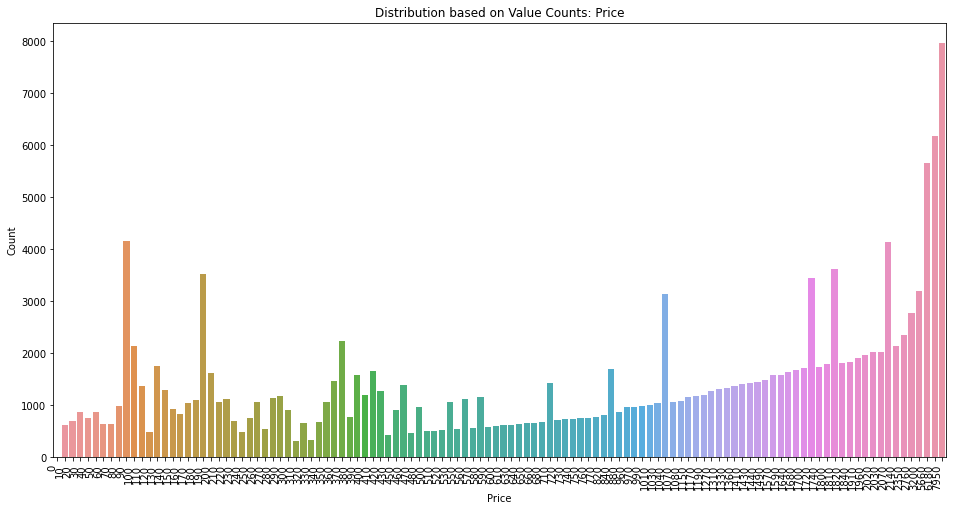

In [35]:
plot_distribution(df, 'Price')

In [36]:
def plot_distribution2(df, column):
    """
    Plots the distribution of a specified column based on value counts in a DataFrame.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The column name for which to plot the distribution.

    """
    plt.figure(figsize=(16, 8))
    rounded_values = df[column].round(1)
    value_counts = rounded_values.value_counts()
    sorted_counts = value_counts.sort_index()
    ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Distribution based on Value Counts: {column}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.ylim(0, sorted_counts.max() + 1)  # Set y-axis limit to include all counts
    plt.show()

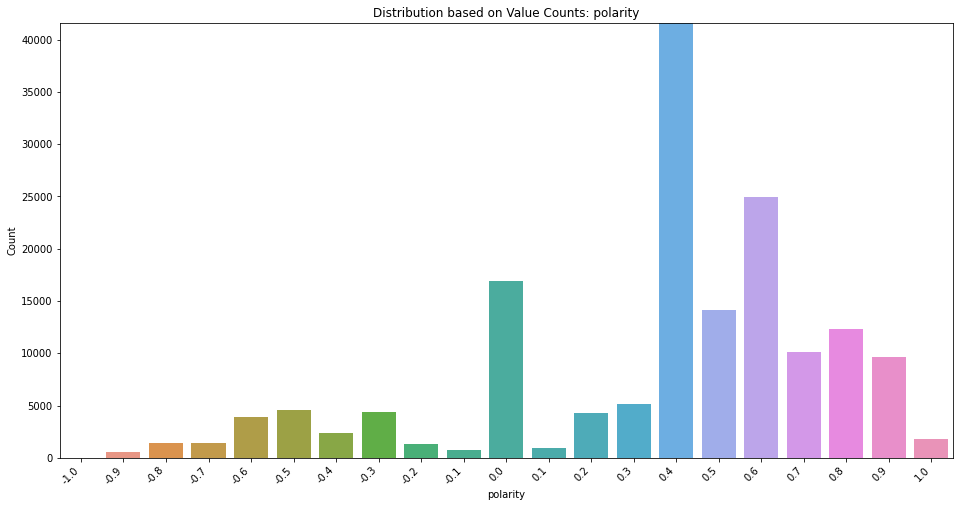

In [37]:
plot_distribution2(df, 'polarity')

In [38]:
def plot_distribution3(df, column):
    """
    Plots the distribution of a specified column based on value counts in a DataFrame.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The column name for which to plot the distribution.

    """
    plt.figure(figsize=(16, 8))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Distribution based on Value Counts: {column}")
    plt.show()

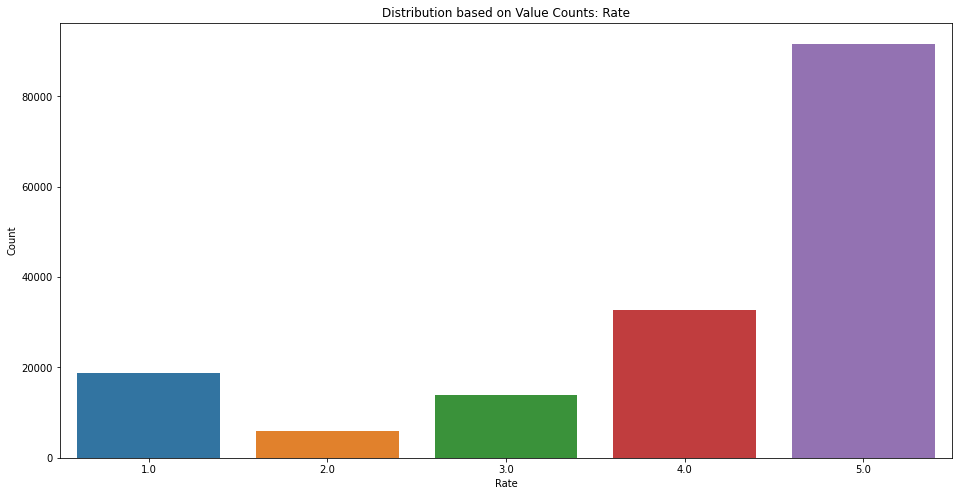

In [39]:
plot_distribution3(df, 'Rate')

- From the bar plot above it's indicated that there was far more 5 star reviews of products in our dataset indicating higher positive sentiments

#### Categorical Univariate Analysis

In [40]:
# No of reviews per sentiments
df.product_sentiment.value_counts()

Positive    124668
Negative     20546
Neutral      17740
Name: product_sentiment, dtype: int64

In [41]:
# Percentage of reviews per sentiment
percentage = df['product_sentiment'].value_counts(normalize=True)
print(percentage * 100)

Positive    76.505026
Negative    12.608466
Neutral     10.886508
Name: product_sentiment, dtype: float64


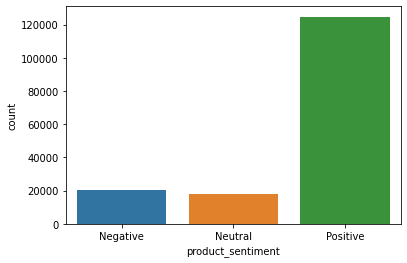

In [42]:
# Visualization of target variable/product sentiment
ax = sns.countplot(x = "product_sentiment", data = df)

- Upon closer inspection, it's confirmed there was far more positive sentiment at 69% followed by neutral sentiment at 22% and negative sentiment at 8%

## Bivariate Analysis

In [43]:
def bivariate_analysis_box(df, x_col, y_col):
    """
    Conducts bivariate analysis between two columns in a DataFrame and generates a box plot.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        x_col (str): The name of the column to be plotted on the x-axis.
        y_col (str): The name of the column to be plotted on the y-axis.

    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=x_col, y=y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Bivariate Analysis: {x_col} vs {y_col} (Box Plot)")
    plt.show()

In [44]:
def bivariate_analysis_scatter(df, x_col, y_col):
    """
    Conducts bivariate analysis between two columns in a DataFrame and generates scatter and box plots.

    Args:
        df (DataFrame): The pandas DataFrame containing the data.
        x_col (str): The name of the column to be plotted on the x-axis.
        y_col (str): The name of the column to be plotted on the y-axis.

    """
    plt.figure(figsize=(10, 8))

    # Scatter plot
    # plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Bivariate Analysis: {x_col} vs {y_col} (Scatter Plot)")
    plt.show()

### Relationship between Price and Sentiment(Polarity scores)

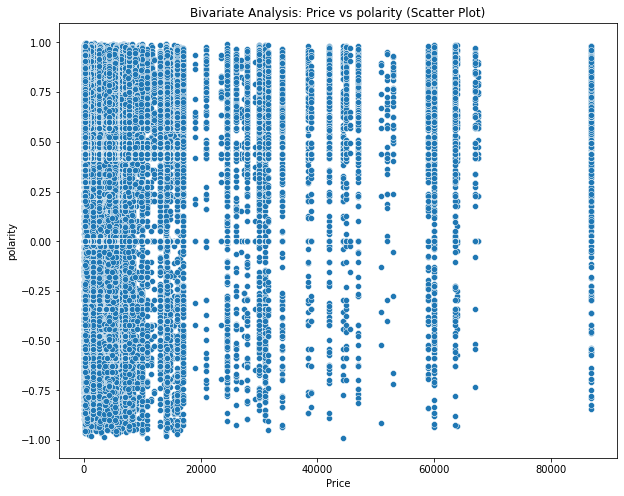

In [45]:
bivariate_analysis_scatter(df, 'Price', 'polarity')

- There's no relationship between Price and Polarity/Customer Sentiments. It makes sense because someone could buy products of higher or lower prices and it wouldn't be a factor for positive or negative sentiments. It could all come down to other factors like quality or wait times for delivery etc.

### Relationship between Price and Rate

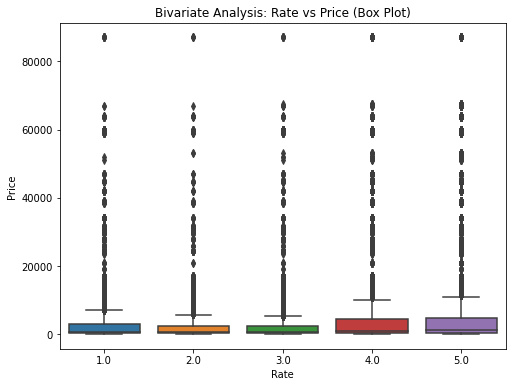

In [46]:
bivariate_analysis_box(df, 'Rate', 'Price')

### Relationship between Sentiment and Rate

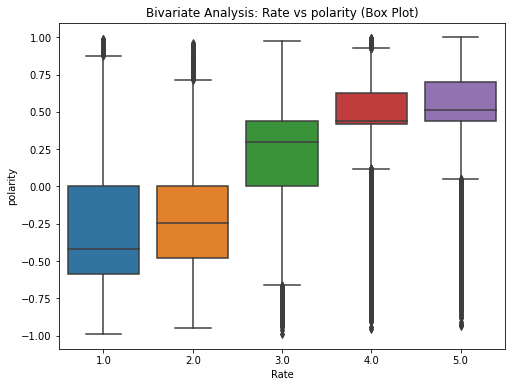

In [47]:
bivariate_analysis_box(df, 'Rate', 'polarity')

### Relationship between product sentiment and Rate

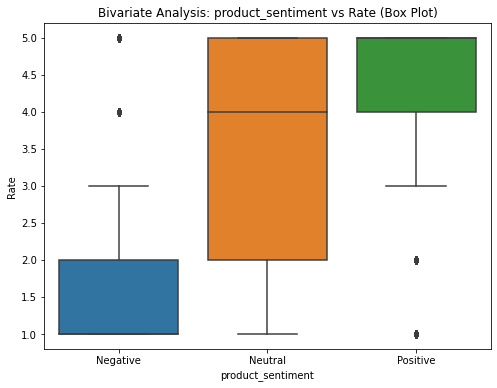

In [48]:
bivariate_analysis_box(df,'product_sentiment', 'Rate')

### Relationship between product sentiment and Price

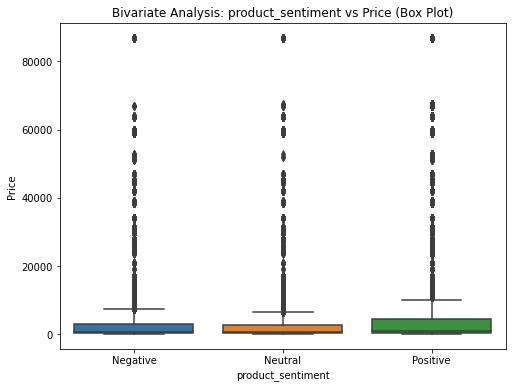

In [49]:
bivariate_analysis_box(df,'product_sentiment', 'Price')

### Relationship between product sentiment and sentiment

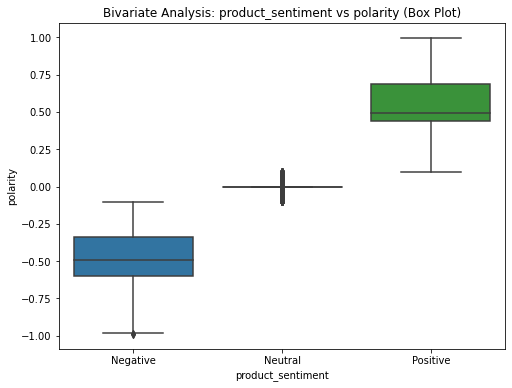

In [50]:
bivariate_analysis_box(df,'product_sentiment', 'polarity')

## Multivariate Analysis

In [51]:
def plot_scatter_3_columns(df, x_col, y_col):
    '''
    Plots the relationship between two columns with differentiating churned and non-churned customers based on product sentiment
    '''

    # Define custom colors for product sentiment
    sentiment_colors = {
        'Positive': 'green',
        'Negative': 'red',
        'Neutral': 'gray'
    }

    # Map sentiment values to corresponding colors
    color_map = [sentiment_colors[sentiment] for sentiment in df['product_sentiment']]

    plt.figure(figsize=(12, 7), dpi=80)
    plt.scatter(df[x_col], df[y_col], c=color_map)
    plt.title(f"{x_col} vs {y_col} - Product Sentiment Comparison", fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)

    # Create custom legend for product sentiment colors
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='green', markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='red', markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label='Neutral', markerfacecolor='gray', markersize=8)
    ]
    plt.legend(handles=legend_elements, title='Product Sentiment')

    plt.tight_layout()
    plt.show()

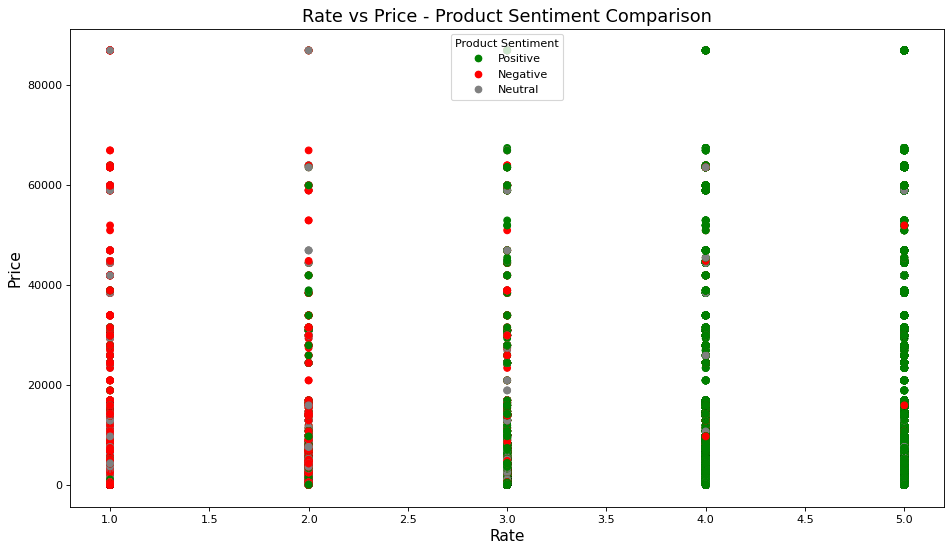

In [52]:
plot_scatter_3_columns(df, 'Rate', 'Price')

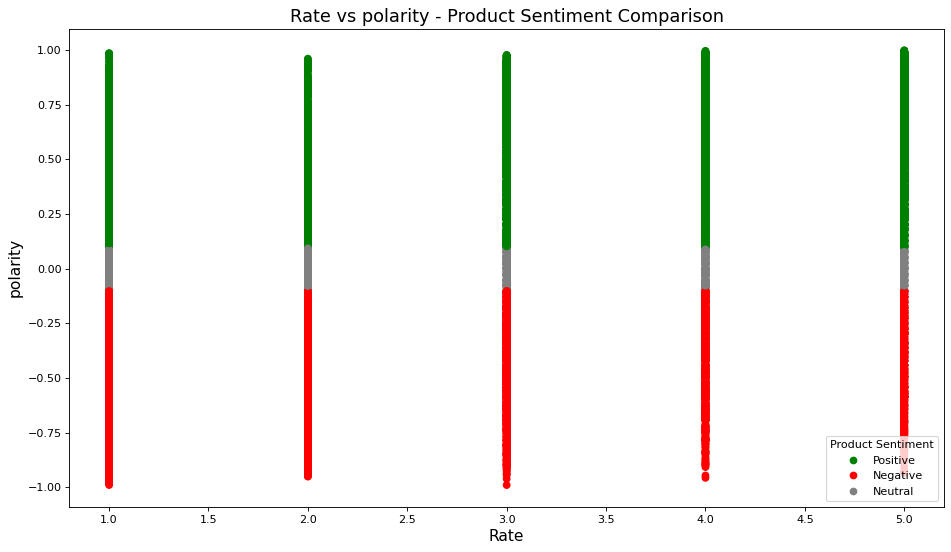

In [53]:
plot_scatter_3_columns(df, 'Rate', 'polarity')

# PREPARATION FOR MODELLING

### 1.3 Text Preprocessing
We will do some text preprocessing to clean our text data(Summary). To do this we'll change it to lowercase, remove stop words, punctuation, We'll also tokenize & lemmatize our texts.

In [54]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(Summary):
    # Use list comprehension for efficient list creation
    new_Summary = [word for word in Summary.split() if word not in stop_words]
    return " ".join(new_Summary)

# Apply the function to the 'Summary' column
df['Summary'] = df['Summary'].apply(remove_stopwords)

In [55]:
# tokenize the Summary text
df['Summary'] = df.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1)
df.head()

,ProductName,Price,Rate,Review,Summary,polarity,product_sentiment
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,"[Great, cooler, excellent, air, flow, price, I...",0.9576,Positive
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,"[Best, budget, 2, fit, cooler, Nice, cooling]",0.8591,Positive
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,"[The, quality, good, power, air, decent]",0.2382,Positive
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,"[Very, bad, product, fan]",-0.3597,Negative
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,"[Ok, ok, product]",0.5267,Positive


In [56]:
# One hot encode target column
df['product_sentiment'] = df['product_sentiment'].map({'Positive':1, 'Negative':0, 'Neutral':2})

In [57]:
lemmatizer = WordNetLemmatizer()

def to_lowercase(words):
    """Convert all characters to lowercase from a list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from a list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def lemmatize_list(words):
    """Lemmatize a list of words using WordNet lemmatizer"""
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    """Normalize a list of words by applying lowercase conversion, punctuation removal, and lemmatization"""
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = lemmatize_list(words)
    return ' '.join(words)

# Apply normalization to the 'Summary' column of the DataFrame
df['Summary'] = df.apply(lambda row: normalize(row['Summary']), axis=1)

# Display the updated DataFrame
df.head()

,ProductName,Price,Rate,Review,Summary,polarity,product_sentiment
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super,great cooler excellent air flow price its amaz...,0.9576,1
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,best budget 2 fit cooler nice cool,0.8591,1
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,the quality good power air decent,0.2382,1
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,very bad product fan,-0.3597,0
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,ok ok product,0.5267,1


In [58]:
df.drop(columns =['ProductName', 'Price', 'Rate', 'Review', 'polarity'], inplace=True)
df.head()

,Summary,product_sentiment
0,great cooler excellent air flow price its amaz...,1
1,best budget 2 fit cooler nice cool,1
2,the quality good power air decent,1
3,very bad product fan,0
4,ok ok product,1


## BERT(Bidirectional Encoder Representation) - HuggingFace Transformers


In [59]:
# Check the samples per class
df['product_sentiment'].value_counts()

1    124668
0     20546
2     17740
Name: product_sentiment, dtype: int64

In [60]:
# Balance out the classes for the purpose of demonstration
positive = df[df['product_sentiment'] == 1].sample(n=17731, random_state=42)
negative = df[df['product_sentiment'] == 0].sample(n=17731, random_state=42)
neutral = df[df['product_sentiment'] == 2]
train_data = pd.concat([positive, negative, neutral]).sample(frac=1).reset_index(drop=True)
train_data['product_sentiment'].value_counts()

2    17740
1    17731
0    17731
Name: product_sentiment, dtype: int64

In [61]:
# Sample reviews and its corresponding labels
reviews = train_data['Summary'].tolist()
labels = train_data['product_sentiment'].tolist()

print("Sample reviews:")
print(reviews[10:16])
print("Corresponding labels:")
print(labels[10:16])

Sample reviews:
['bad', 'avarage quality', 'receive good condition product good price range one thing dust cover good per product', 'quality poor', 'transparent', 'after one month face problem adapter os work properly engineer knowledge liv pure ro']
Corresponding labels:
[0, 2, 1, 0, 2, 0]


In [62]:
# Split the data into train, test and validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(reviews, labels, test_size=.2, random_state=42)
# Number of train and test data
print("Number of train data points:", len(X_train))
print("Number of train labels:", len(y_train))
print("Number of test data points:", len(X_test))
print("Number of test labels:", len(y_test))

Number of train data points: 42561
Number of train labels: 42561
Number of test data points: 10641
Number of test labels: 10641


In [63]:
# Load the tokenizer
import tensorflow as tf
from transformers import DistilBertTokenizerFast
MODEL_NAME = 'bert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)
# Sample tokenization
print("Sentence:" , X_train[10])
tokenizer(X_train[10], truncation=True, padding=True, max_length=256, return_tensors="tf")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizerFast'.


Sentence: good


{'input_ids': <tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[ 101, 2204,  102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 1, 1]], dtype=int32)>}

In [64]:
# Perform tokenization
MAX_LENGTH=256
train_encodings = tokenizer(X_train,
                            truncation=True,
                            padding=True,
                            return_tensors="tf",
                            max_length=MAX_LENGTH)
test_encodings = tokenizer(X_test,
                           truncation=True,
                           padding=True,
                           return_tensors="tf",
                           max_length=MAX_LENGTH)
# Convert the tokenizer to TF object
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),
                                                    y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings),
                                                   y_test))

In [65]:
# Define the model - use pretrained distilbert model and specify the label
from transformers import TFBertForSequenceClassification
model = TFBertForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path=MODEL_NAME,
    num_labels=3
    )

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
# Specify the model optimizer
optimizer = tf.keras.optimizers.Adam(
            learning_rate=5e-5,
        )
# Specify the loss function
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Compile the model

model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
# Inspect the model
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Define hyperparameters
BATCH_SIZE = 32
NUM_EPOCHS = 2

# Train the model
model.fit(train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE),
          epochs=NUM_EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=test_dataset.shuffle(len(X_test)).batch(BATCH_SIZE)
          )

Epoch 1/2
   3/1331 [..............................] - ETA: 13:24:15 - loss: 1.0715 - accuracy: 0.5104

In [ ]:
# Save the model
model.save_pretrained("/content/drive/MyDrive/sentiment_model")

In [ ]:
file_path = '/content/drive/MyDrive/sentiment_model.pkl'

with open(file_path, 'wb') as file:
    # Use pickle to dump the model into the file
    pickle.dump(model, file)

In [ ]:
X = df['Summary']
y = df['product_sentiment']

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TF-IDF Vectorization

In [ ]:
# Vectorize the text data using TF-IDF vectorizer
# we vectorize so that machine algorithm can be able to understand
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

### Resampling

In [ ]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_vectorized, y_train)
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_smote).value_counts())

Original class distribution: 

1    124565
0     20658
2     17731
Name: product_sentiment, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    99694
2    99694
1    99694
Name: product_sentiment, dtype: int64


## RANDOM FOREST

In [ ]:
forest = RandomForestClassifier()

forest.fit(X_train_smote,y_train_smote)
y_pred_forest = forest.predict(X_test_vectorized)

print('Accuracy on training set:',forest.score(X_train_smote,y_train_smote))
print('Accuracy on test set:',forest.score(X_test_vectorized,y_test))

Accuracy on training set: 0.9928013053276359
Accuracy on test set: 0.9455371114724924


In [ ]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      4207
           1       0.97      0.97      0.97     24871
           2       0.89      0.91      0.90      3513

    accuracy                           0.95     32591
   macro avg       0.90      0.91      0.90     32591
weighted avg       0.95      0.95      0.95     32591



In [ ]:
file_path = '/content/drive/MyDrive/forest_model.pkl'

with open(file_path, 'wb') as file:
    # Use pickle to dump the model into the file
    pickle.dump(forest, file)

## NAIVE BAYES

In [ ]:
nbc = MultinomialNB()
nbc.fit(X_train_smote,y_train_smote)
y_pred_nbc = nbc.predict(X_test_vectorized)

print('Accuracy on training set:',nbc.score(X_train_smote,y_train_smote))
print('Accuracy on test set:',nbc.score(X_test_vectorized,y_test))

Accuracy on training set: 0.8910967560735852
Accuracy on test set: 0.8665889355957166


In [ ]:
print(classification_report(y_test, y_pred_nbc))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70      4207
           1       0.97      0.89      0.93     24871
           2       0.71      0.70      0.71      3513

    accuracy                           0.87     32591
   macro avg       0.75      0.82      0.78     32591
weighted avg       0.89      0.87      0.87     32591

